In [1]:
import pandas as pd
import os
from datetime import datetime

In [2]:
def calculate_values(df,subject,method,order):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results=[]
    score_value=0
   
   
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("consumedTime:"):
            score_text,score_value=data[i][0].split(":")
            accuracy_text,accuracy_score=data[i][1].split(":")
            score_value=int(score_value)
            accuracy_score=float(accuracy_score)
            
            results.append([
                subject,
                order,
                method,
                score_value,
                accuracy_score
                ])
        
    return results
            
    
    
    

In [3]:

# .txtファイルからデータを読み込む
def read_txt_to_dataframe(file_path):
    # ファイルを読み込み、各行をリストに格納
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 各行をカンマで分割してデータフレームに変換
    data = [line.strip().split(',') for line in lines]

    # データフレームに変換
    df = pd.DataFrame(data)
    return df

# 全てのフォルダを処理し、結果を統合
all_results = []
def calculate_all_folders(files_paths,subject_name,sorted_indices):
    for i, file_path in enumerate(files_paths):
            method=i-1
          
            order=sorted_indices.index(i-1)
            df = read_txt_to_dataframe(file_path)
            all_results.extend(calculate_values(df,subject_name, method,order))
        

# ファイルの作成日時を取得する関数
def get_creation_time(file_name):
    return os.path.getctime(file_name)


In [4]:

subject_names=["朴さん","水上","佐々木","村上","万くん","竹村","平岡拓海","吉村厚紀"]

# subject_names=["朴さん"]

for i in range(len(subject_names)):
        root_path = r"C:\Users\takaharayota\Research\Exp2-data\{}\Values".format(subject_names[i])
        files_paths = [
                root_path + r"\音無し.txt",
        
        root_path + r"\離散指数.txt",
        root_path + r"\連続指数.txt",
        root_path + r"\連続線形.txt",
                root_path + r"\離散線形.txt",
        
        ]
        # ファイル名と元のインデックスのタプルのリストを作成
        indexed_files = list(enumerate(files_paths))
        # 作成日時順に並べ替える
        sorted_indexed_files = sorted(indexed_files, key=lambda x: get_creation_time(x[1]))
        # 並べ替え後のインデックスを抽出
        sorted_indices = [index-1 for index, file in sorted_indexed_files]
        calculate_all_folders(files_paths,subject_names[i],sorted_indices)


    
print(all_results)  



# 統合されたデータをデータフレームに変換
columns = ['Subject','Order','Method', 'Score','Accuracy']
df_all = pd.DataFrame(all_results, columns=columns)

# データの表示
# DataFrameを.txtファイルに出力
df_all.to_csv('output-ave.txt', sep='\t', index=False)

print("DataFrameの内容がoutput-ave.txtに出力されました。")


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[['朴さん', 1, -1, 4, 1.0], ['朴さん', 2, 0, 3, 1.0], ['朴さん', 3, 1, 14, 1.0], ['朴さん', 0, 2, 12, 0.8571429], ['朴さん', 4, 3, 13, 0.9285714], ['水上', 3, -1, 11, 0.5789474], ['水上', 1, 0, 30, 1.0], ['水上', 2, 1, 24, 0.9230769], ['水上', 4, 2, 26, 1.0], ['水上', 0, 3, 29, 0.9354839], ['佐々木', 1, -1, 2, 1.0], ['佐々木', 0, 0, 12, 1.0], ['佐々木', 2, 1, 10, 0.7142857], ['佐々木', 4, 2, 9, 1.0], ['佐々木', 3, 3, 6, 1.0], ['村上', 3, -1, 4, 0.5714286], ['村上', 4, 0, 9, 0.6428571], ['村上', 0, 1, 4, 0.4444444], ['村上', 2, 2, 14, 0.9333333], ['村上', 1, 3, 2, 0.2222222], ['万くん', 2, -1, 3, 0.3333333], ['万くん', 3, 0, 2, 0.2857143], ['万くん', 0, 1, 1, 0.25], ['万くん', 1, 2, 3, 0.3333333], ['万くん', 4, 3, 5, 0.8333333], ['竹村', 3, -1, 3, 0.15], ['竹村', 1, 0, 12, 0.8571429], ['竹村', 4, 1, 13, 0.9285714], ['竹村', 2, 2, 8, 0.8888889], ['竹村', 0, 3, 12, 0.8571429], ['平岡拓海', 2, -1, 5, 0.3846154], ['平岡拓海', 4, 0, 11, 1.0], ['平岡拓海', 3, 1, 13, 1.0], ['平岡拓海', 1, 2, 3, 0.6], ['平

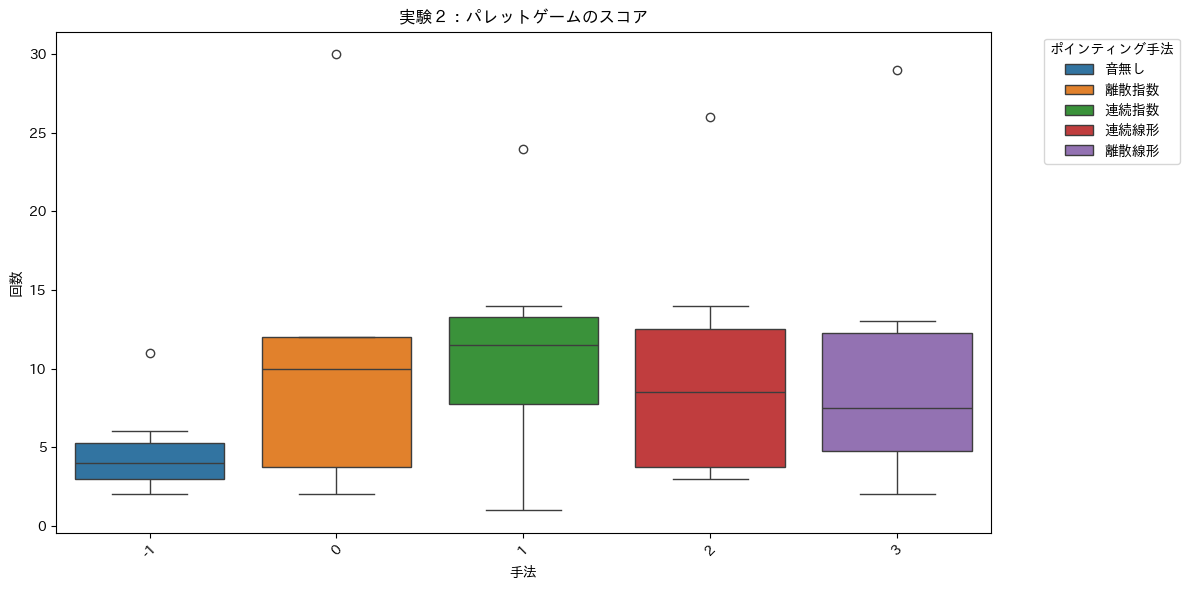

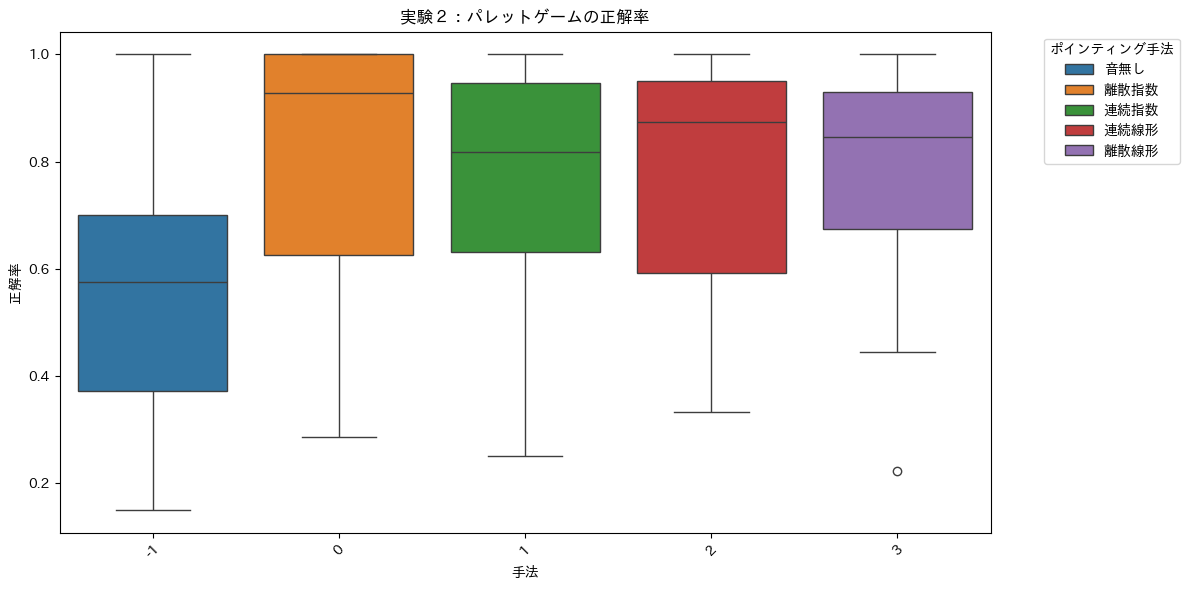

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# データフレームの例
# df_all = pd.DataFrame(...)

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    -1: '音無し',
    0: '離散指数',
    1: '連続指数',
    2: '連続線形',
    3: '離散線形',


}

# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)


# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method', y='Score', hue='Method_Label', data=df_all)
plt.title('実験２：パレットゲームのスコア')
plt.xlabel('手法')
plt.ylabel('回数')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method', y='Accuracy', hue='Method_Label', data=df_all)
plt.title('実験２：パレットゲームの正解率')
plt.xlabel('手法')
plt.ylabel('正解率')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

